# A Guide to Time Series Forecasting

**Forecasting** is where we try to predict an variables future value. Businesses forecast product demand, governments forecast economic and population growth, meteorologists forecast the weather. In this guide you'll learn to:

- engineer features to model the major time series components (trends, seasons, and cycles),
- visualize time series with many kinds of time series plots,
- create forecasting hybrids that combine the strengths of complementary models, and
- adapt machine learning methods to a variety of forecasting tasks.

Written with the help of [this kaggle tutorial](https://www.kaggle.com/code/ryanholbrook/linear-regression-with-time-series) and these [videos](https://www.youtube.com/watch?v=9QtL7m3YS9I), and some figures taken from [this blog](https://medium.com/analytics-vidhya/time-series-forecasting-c73dec0b7533).

> “Forecasting is the art of saying what will happen, and then explaining why it didn’t!”
>

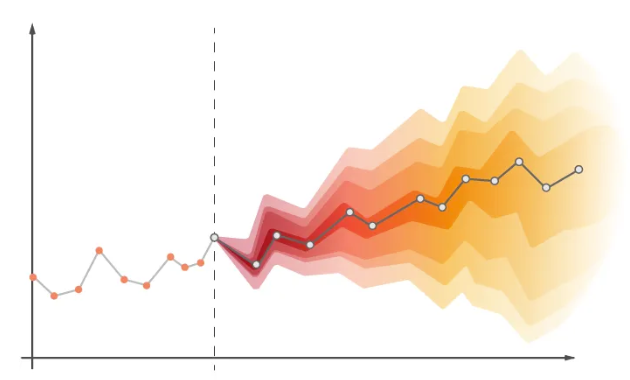

In [1]:
from traitlets.config import Config
import nbformat as nbf
from nbconvert.exporters import HTMLExporter
from nbconvert.preprocessors import TagRemovePreprocessor

# Setup config
c = Config()

# Configure tag removal - be sure to tag your cells to remove  using the
# words remove_cell to remove cells. You can also modify the code to use
# a different tag word
c.TagRemovePreprocessor.remove_cell_tags = ("remove_cell",)
c.TagRemovePreprocessor.remove_all_outputs_tags = ("remove_output",)
c.TagRemovePreprocessor.remove_input_tags = ("remove_input",)
c.TagRemovePreprocessor.enabled = True

# Configure and run out exporter
c.HTMLExporter.preprocessors = ["nbconvert.preprocessors.TagRemovePreprocessor"]

exporter = HTMLExporter(config=c)
exporter.register_preprocessor(TagRemovePreprocessor(config=c), True)


First, we will import the necessary tools, and load in the data.

In [2]:
# Data processing
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt 
import seaborn as sns 

# Misc 
from pathlib import Path
from warnings import simplefilter 

simplefilter("ignore")  # filer some warnings to clean up output cells

In [3]:
# Plotting Styles
plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

In [51]:
# Loading in the data
data_dir = Path("./data")
df = pd.read_csv(data_dir / "tunnel.csv", parse_dates=["Day"])

# Setting day as the index col
df = df.set_index("Day")

By default, Pandas represents a time series as a sequence of measurements taken at single moments A `PeriodIndex`,
represents a time series as a sequence of quantities accumulated over periods of time and are often easier to work with.

In [5]:
# df = df.to_period() # converting into period index

df.head()

,NumVehicles
Day,
2003-11-01,103536
2003-11-02,92051
2003-11-03,100795
2003-11-04,102352
2003-11-05,106569


We can visualise this data by plotting it.

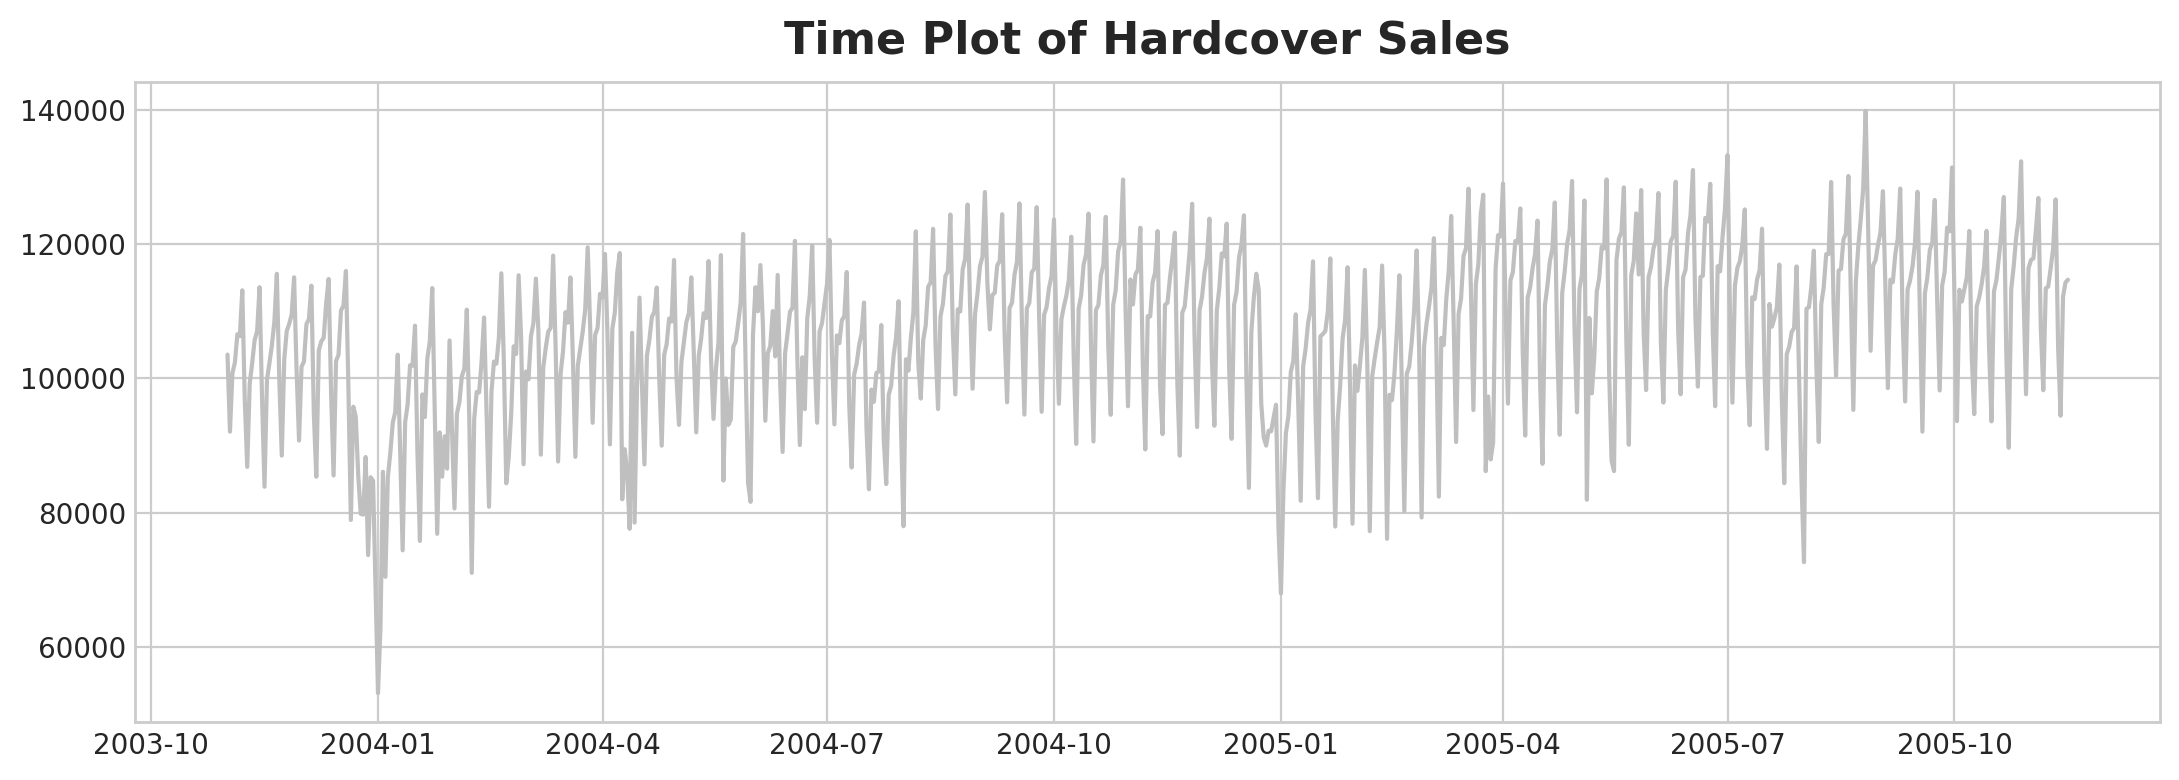

In [6]:
fig, ax = plt.subplots()
ax.plot(df.index.to_timestamp(), 'NumVehicles', data=df, color='0.75')
# ax = sns.regplot(x=df.index.to_timestamp(), y='NumVehicles', data=df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Hardcover Sales');

We can also produce a linear regression plot by using a dummy variable for time, and a lag variable that is the previous day's results. This allows us to see whether the previous day's results will impact future dates.

In [53]:
df['Time'] = np.arange(len(df.index))
df['Lag'] = df['NumVehicles'].shift(1)
df.head()

,NumVehicles,Time,Lag
Day,,,
2003-11-01,103536,0,NaN
2003-11-02,92051,1,103536.0
2003-11-03,100795,2,92051.0
2003-11-04,102352,3,100795.0
2003-11-05,106569,4,102352.0


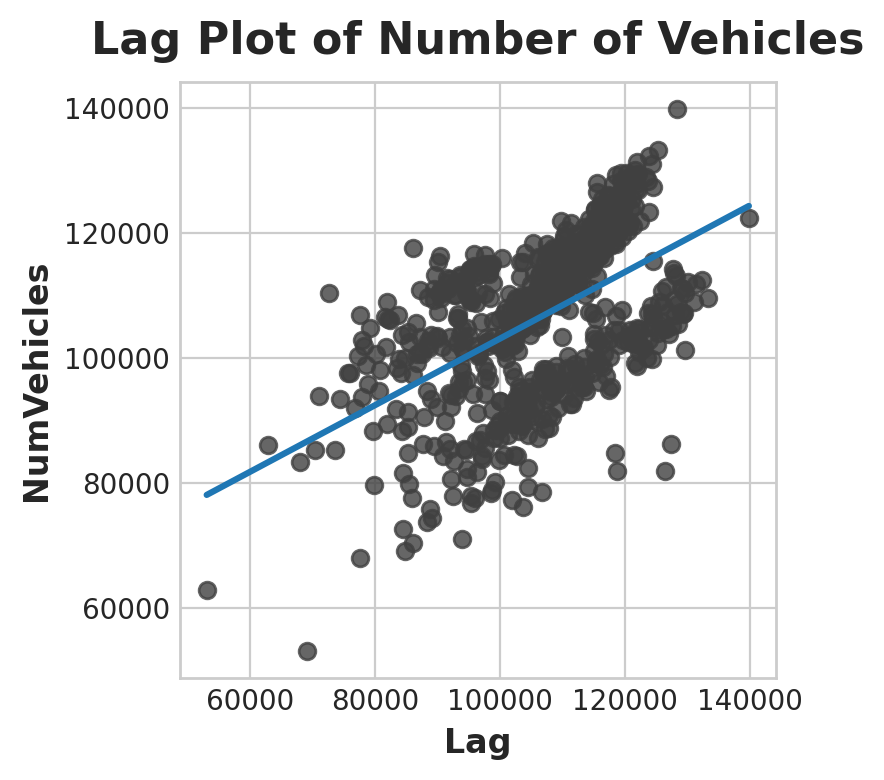

In [8]:
fig, ax = plt.subplots()
ax = sns.regplot(x='Lag', y='NumVehicles', data=df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
ax.set_title('Lag Plot of Number of Vehicles');

We can begin by fitting a simple linear curve to our time series data

In [54]:
from sklearn.linear_model import LinearRegression

# Training data
X = df.loc[:, ['Time']]  # features
y = df.loc[:, 'NumVehicles']  # target

# Train the model
model = LinearRegression()
model.fit(X, y)

# Store the fitted values as a time series with the same time index as
# the training data
y_pred = pd.Series(model.predict(X), index=X.index)

In [55]:
y_pred

Day
2003-11-01     98176.206344
2003-11-02     98198.703794
2003-11-03     98221.201243
2003-11-04     98243.698693
2003-11-05     98266.196142
                  ...      
2005-11-12    114869.313898
2005-11-13    114891.811347
2005-11-14    114914.308797
2005-11-15    114936.806247
2005-11-16    114959.303696
Length: 747, dtype: float64

In [56]:
y

Day
2003-11-01    103536
2003-11-02     92051
2003-11-03    100795
2003-11-04    102352
2003-11-05    106569
               ...  
2005-11-12    104646
2005-11-13     94424
2005-11-14    112165
2005-11-15    114296
2005-11-16    114690
Name: NumVehicles, Length: 747, dtype: int64

In [59]:
y.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 747 entries, 2003-11-01 to 2005-11-16
Series name: NumVehicles
Non-Null Count  Dtype
--------------  -----
747 non-null    int64
dtypes: int64(1)
memory usage: 11.7 KB


<Axes: xlabel='Day', ylabel='NumVehicles'>

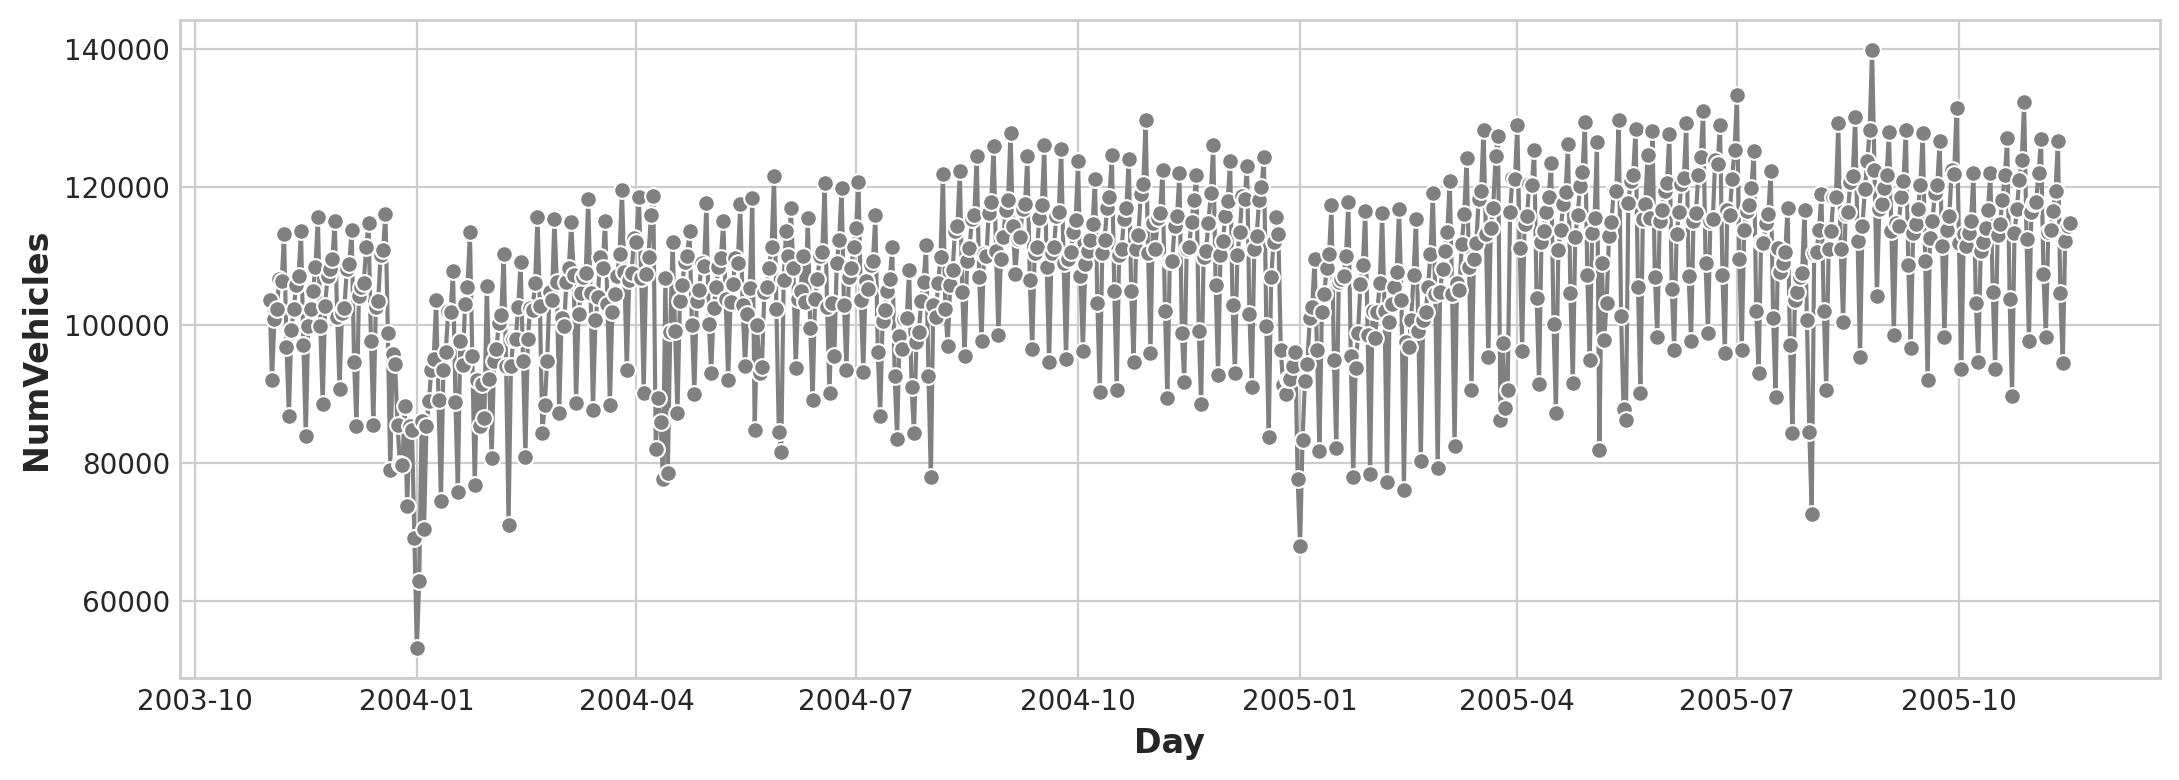

In [78]:
sns.lineplot(y, marker='o', color='gray')

KeyError: 'y'

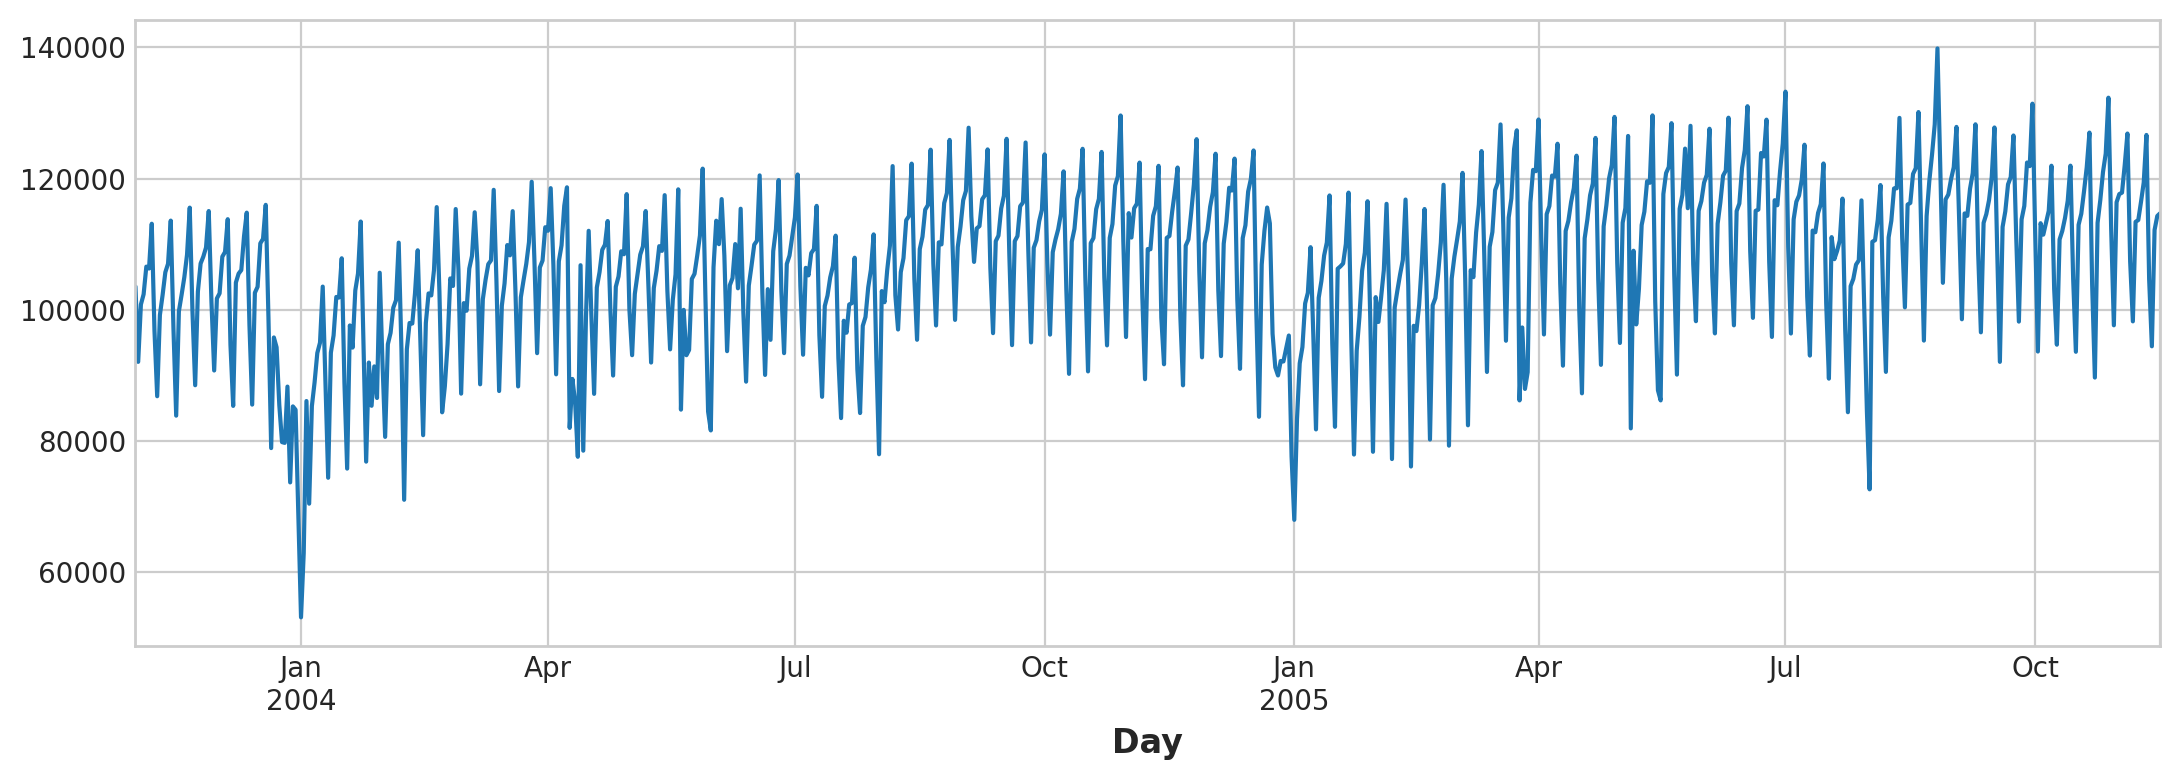

In [58]:
# fig, ax = plt.subplots()
# y.plot(ax=ax)
# ax = sns.lineplot(data = y, x = 'Day', ax=ax)
# ax = y_pred.plot(ax=ax, linewidth=3)
# ax.set_title('Tunnel Traffic over Time')
# plt.show()

In [10]:
print("hello world")

hello world


In [11]:
print("no output")

no output


In [12]:
output = HTMLExporter(config=c).from_filename("time-series-forcasting.ipynb")
with open("output.html", "w") as f:
    f.write(output[0])